In [1]:
import numpy as np
from sklearn.model_selection import train_test_split 
from fastdtw import fastdtw

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'

# 1.计算DTW

In [ ]:
# def dtw(ds):
#     # 初始化一个空的矩阵来存储DTW距离
#     n = ds.shape[0]
#     dtw_distances = np.zeros((n, n))

#     # 计算每对时间序列之间的DTW距离
#     for i in range(n):
#         for j in range(i + 1, n):
#             distance, _ = fastdtw(ds[i,:], ds[j,:])
#             dtw_distances[i, j] = dtw_distances[j, i] = distance
#     return dtw_distances

# train_dtw = []
# for step in [1, 12, 72, 144, 288]:
#     dataset = np.load(f'dataset/dataset_{step}.npy')
#     train , test = train_test_split(
#         dataset, random_state = 12, 
#         shuffle=True,test_size =0.2
#         )
#     local_dtw = dtw(train[:100, :]).flatten()
#     local_dtw = local_dtw[local_dtw != 0]
#     train_dtw.append(local_dtw)

# 2.保存计算结果
    由于计算时间较长，后续可直接读取保存的文件。
    如果需要重新计算，重新运行上述代码即可。

In [ ]:
# np.save('train_dtw.npy', train_dtw)

In [16]:
train_dtw = np.load('train_dtw.npy')

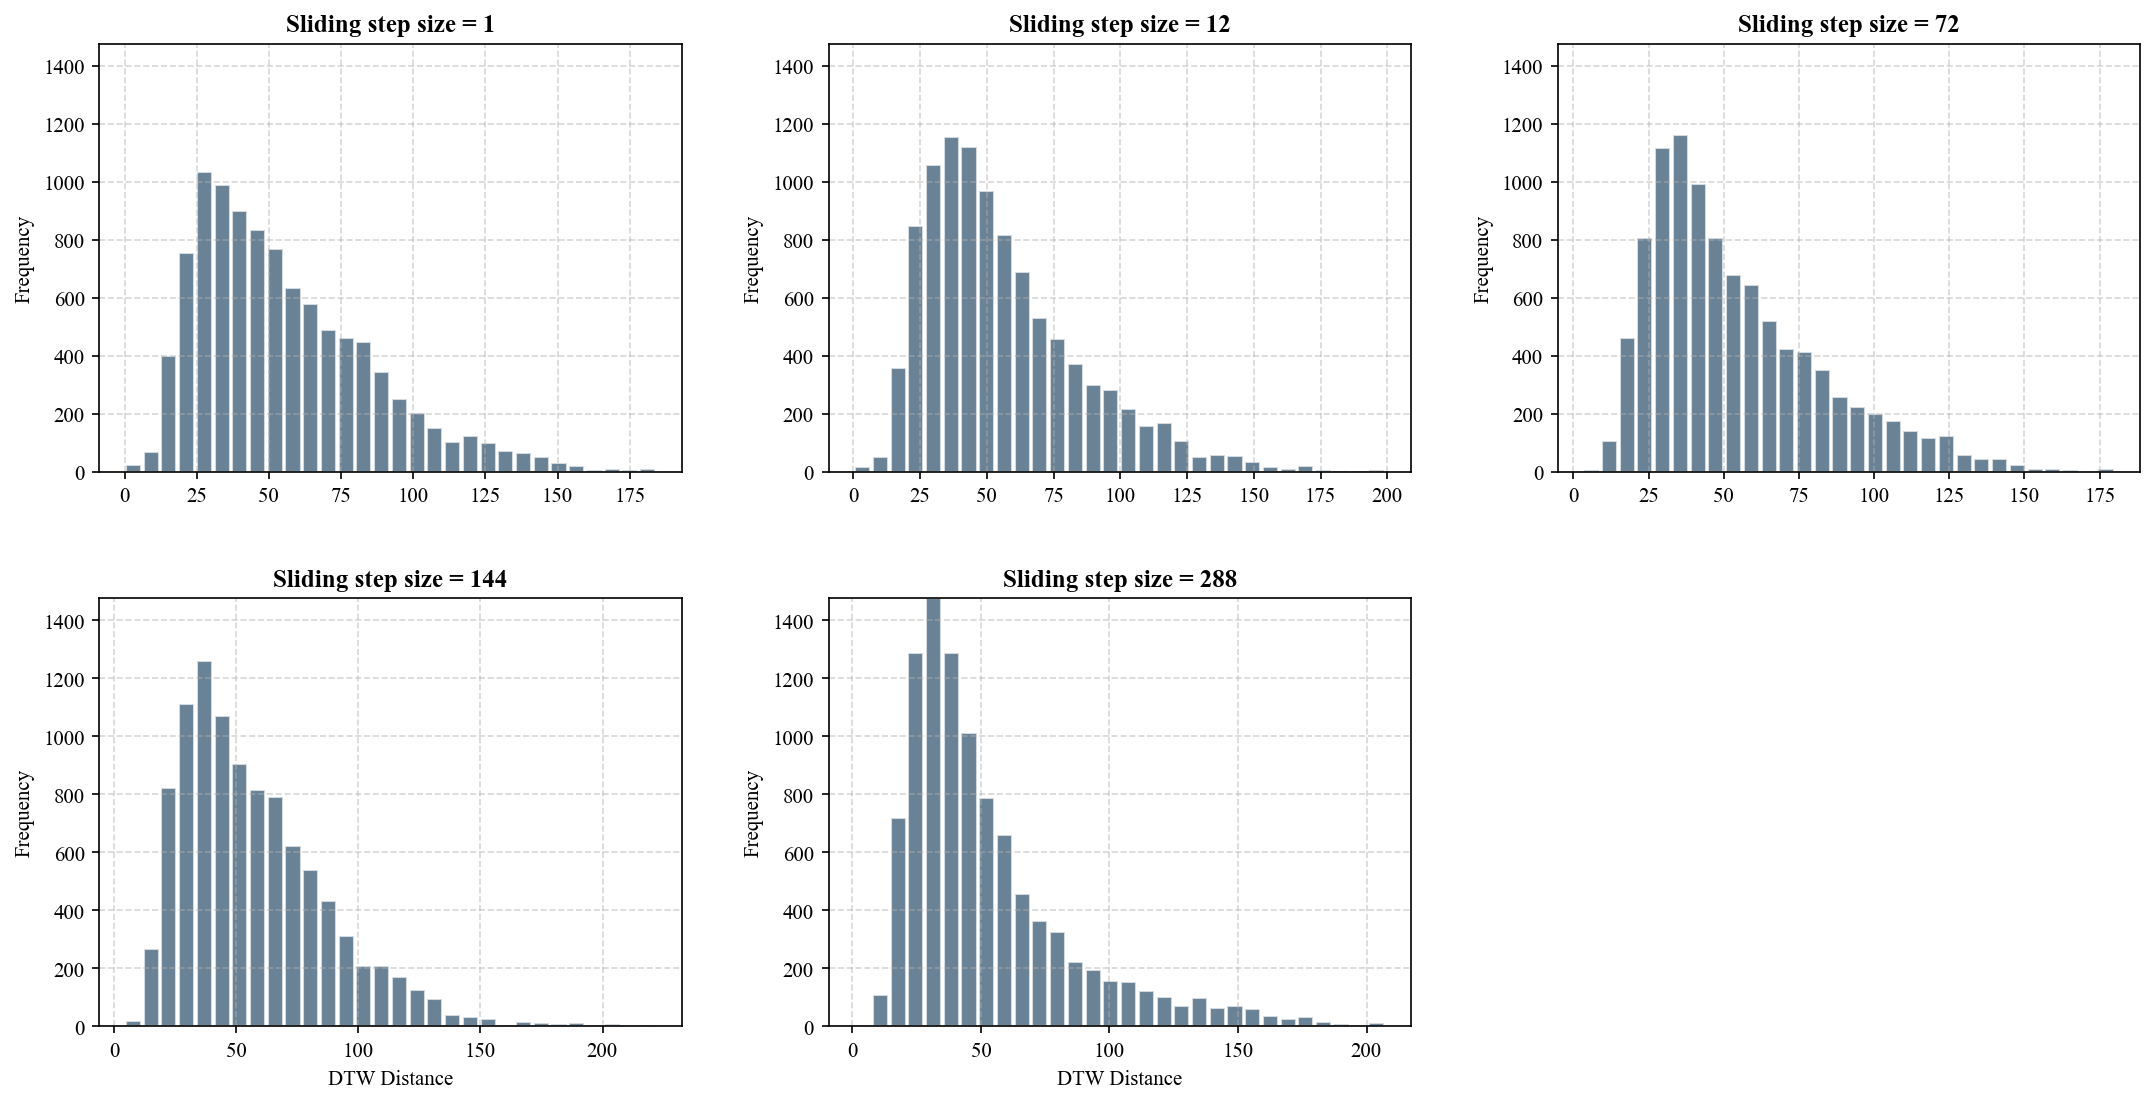

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8), dpi=150)

academic_color = "#2a4d69"

# 找出所有数据集中的最大频率
max_freq = max([np.histogram(train_dtw[i], bins=30)[0].max() for i in range(5)])
steplist = [1, 12, 72, 144, 288]
axes = axes.flatten()

# 绘制每个子图的直方图，并统一纵轴范围
for i in range(5):
    axes[i].hist(train_dtw[i], bins=30, color=academic_color, alpha=0.7, rwidth=0.85, edgecolor='white')
    axes[i].set_ylim(0, max_freq)
    axes[i].set_title(f'Sliding step size = {steplist[i]}', fontsize=12, weight='bold')
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.5)

axes[-1].axis('off')

axes[3].set_xlabel('DTW Distance', fontsize=10)
axes[4].set_xlabel('DTW Distance', fontsize=10)
axes[5].set_xlabel('DTW Distance', fontsize=10)

plt.tight_layout(pad=3.0)
plt.show()

In [5]:
for i in range(5):
    print(np.std(train_dtw[i]))

30.25834874440279
29.097268265135067
28.624631380565663
29.639551801856875
32.62230291222386
